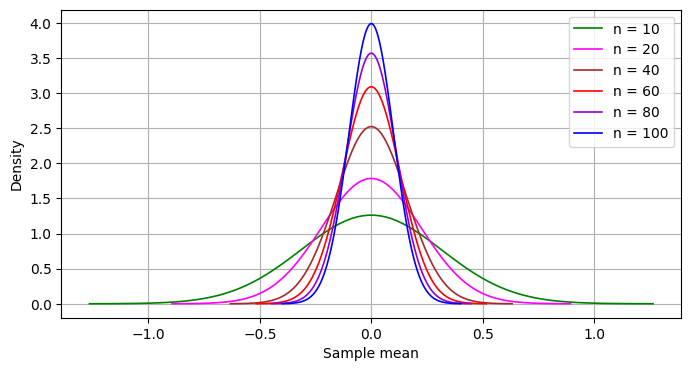

In [1]:
# Simulation of sample mean distributions for increasing sample sizes
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Population parameters
len_normal_data = 10000
mu, sigma = 0, 1
population = np.random.normal(mu, sigma, len_normal_data)

# Function to generate theoretical normal curve ("shroud")
def normal_shroud(mean, sd, points=100):
    xs = np.linspace(mean - 4*sd, mean + 4*sd, points)
    ys = norm.pdf(xs, mean, sd)
    return xs, ys

# Function to compute sample means
def mean_dist(sample_size=1, n_trials=2000, population=population):
    means = []
    for _ in range(n_trials):
        sample = np.random.choice(population, size=sample_size, replace=True)
        means.append(np.mean(sample))
    return means

# Sample sizes to explore
sample_sizes = [10, 20, 40, 60, 80, 100]
means_list = [mean_dist(sl) for sl in sample_sizes]
colours = ['green', 'magenta', 'brown', 'red', 'darkviolet', 'blue']

# Plot sample mean distributions with theoretical normal curves
fig, ax = plt.subplots(figsize=(8, 4))
for i, sample_means in enumerate(means_list):
    nx, ny = normal_shroud(mu, sigma/np.sqrt(sample_sizes[i]))
    ax.plot(nx, ny, color=colours[i], lw=1.2, label=f'n = {sample_sizes[i]}')
ax.legend()
ax.set_xlabel('Sample mean')
ax.set_ylabel('Density')
ax.grid(True)

# Save figure and show
fig.savefig('img/various_sample_sizes.jpg', dpi=300)
plt.show()
